In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn._config import set_config
set_config(print_changed_only=False)

In [2]:
import pandas as pd

feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])

In [3]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

new_feature_name_df = get_new_feature_name_df(feature_name_df)
feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
train_X = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
test_X = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
train_y = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
test_y = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [4]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [5]:
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(train_X, train_y)

predict = rf_clf.predict(test_X)
accuracy = accuracy_score(test_y, predict)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9257


In [6]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)

grid_cv = GridSearchCV(rf_clf , param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_X, train_y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/home/chani22/miniconda3/envs/python_39/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/chani22/miniconda3/envs/python_39/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/chani22/miniconda3/envs/python_39/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/chani22/miniconda3/envs/python_39/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9189


In [7]:
train_y[:3]

,action
0,5
1,5
2,5


In [8]:
train_y.shape

(7352, 1)

In [9]:
train_y = train_y.values.ravel()
train_y.shape

(7352,)

In [10]:
train_y[:3]

array([5, 5, 5])

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)

grid_cv = GridSearchCV(rf_clf , param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_X, train_y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9189


In [12]:
rf_clf1 = RandomForestClassifier(max_depth=12,
                                 min_samples_leaf=8,
                                 min_samples_split=8,
                                 n_estimators=100,
                                 random_state=42)
rf_clf1.fit(train_X, train_y)

predict = rf_clf1.predict(test_X)
print('예측 정확도: {0:.4f}'.format(accuracy_score(test_y, predict)))

예측 정확도: 0.9291


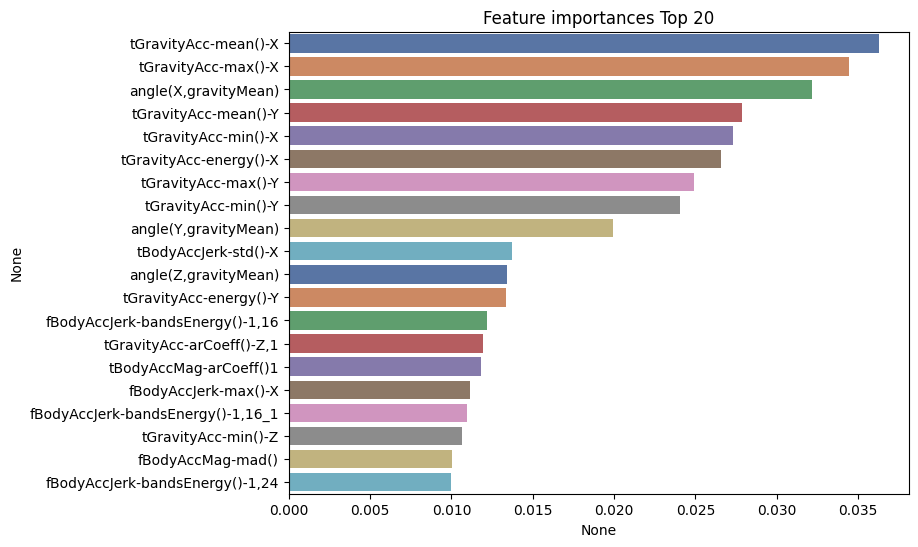

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')

palette = sns.color_palette('deep', 20)
sns.barplot(x=ftr_top20, y=ftr_top20.index, palette=palette)

fig1 = plt.gcf()
plt.show()
plt.draw()

fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')